In [16]:
import numpy as np
import math
import pandas as pd
from data import fetch_dataset
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

init_notebook_mode(connected=True)
np.set_printoptions(suppress=True, floatmode='fixed')

# Import variables

In [17]:
clients = list(range(10, 100, 10))
# Initialize lists to store the last value of each file
fedlbskd_smape_last = []
fedcsakd_smape_last = []
fedkd_smape_last = []
fedlbs_smape_last = []
fedcsa_smape_last = []

fedlbskd_rmse_last = []
fedcsakd_rmse_last = []
fedkd_rmse_last = []
fedlbs_rmse_last = []
fedcsa_rmse_last = []

fedlbskd_mae_last = []
fedcsakd_mae_last = []
fedkd_mae_last = []
fedlbs_mae_last = []
fedcsa_mae_last = []

fedlbskd_loss_last = []
fedcsakd_loss_last = []
fedkd_loss_last = []
fedlbs_loss_last = []
fedcsa_loss_last = []

In [18]:
# Load the .npy files and extract the last value ([-1]) from each
for C in clients:
    fedlbskd_smape_last.append(np.load(f'metrics/fedlbskd_smape_C{C}.npy')[-1])
    fedcsakd_smape_last.append(np.load(f'metrics/fedcsakd_smape_C{C}.npy')[-1])
    fedkd_smape_last.append(np.load(f'metrics/fedkd_smape_C{C}.npy')[-1])

    fedlbskd_rmse_last.append(np.load(f'metrics/fedlbskd_rmse_C{C}.npy')[-1])
    fedcsakd_rmse_last.append(np.load(f'metrics/fedcsakd_rmse_C{C}.npy')[-1])
    fedkd_rmse_last.append(np.load(f'metrics/fedkd_rmse_C{C}.npy')[-1])

    fedlbskd_mae_last.append(np.load(f'metrics/fedlbskd_mae_C{C}.npy')[-1])
    fedcsakd_mae_last.append(np.load(f'metrics/fedcsakd_mae_C{C}.npy')[-1])
    fedkd_mae_last.append(np.load(f'metrics/fedkd_mae_C{C}.npy')[-1])

    fedlbskd_loss_last.append(np.load(f'metrics/fedlbskd_loss_C{C}.npy')[-1])
    fedcsakd_loss_last.append(np.load(f'metrics/fedcsakd_loss_C{C}.npy')[-1])
    fedkd_loss_last.append(np.load(f'metrics/fedkd_loss_C{C}.npy')[-1])

    fedlbs_smape_last.append(np.load(f'metrics/fedlbs_smape_C{C}.npy')[-1])
    fedcsa_smape_last.append(np.load(f'metrics/fedcsa_smape_C{C}.npy')[-1])

    fedlbs_rmse_last.append(np.load(f'metrics/fedlbs_rmse_C{C}.npy')[-1])
    fedcsa_rmse_last.append(np.load(f'metrics/fedcsa_rmse_C{C}.npy')[-1])

    fedlbs_mae_last.append(np.load(f'metrics/fedlbs_mae_C{C}.npy')[-1])
    fedcsa_mae_last.append(np.load(f'metrics/fedcsa_mae_C{C}.npy')[-1])

    fedlbs_loss_last.append(np.load(f'metrics/fedlbs_loss_C{C}.npy')[-1])
    fedcsa_loss_last.append(np.load(f'metrics/fedcsa_loss_C{C}.npy')[-1])    

In [19]:
def comparison(fedlbskd, fedkd, fedcsakd, fedlbs, fedcsa, metric):
    bar_width = 0.15
    x = np.arange(len(clients))
    
    fig, ax = plt.subplots(figsize=(10, 9))  # Specify figure size
    
    fig_width, fig_height = fig.get_size_inches()
    font_size = min(fig_width, fig_height) * 1.7
    tick_size = font_size * 2  
    legend_size = font_size * 1.7

    # Plot bars
    ax.bar(x-bar_width, fedkd, width=bar_width, label='Our approach', color='black')
    ax.bar(x, fedcsakd, width=bar_width, label='fedcsakd', color='g')
    ax.bar(x + bar_width, fedcsa, width=bar_width, label='fedcsa', color='olive')
    ax.bar(x + bar_width * 2, fedlbskd, width=bar_width, label='fedlbskd', color='brown')
    ax.bar(x + bar_width * 3, fedlbs, width=bar_width, label='fedlbs', color='rosybrown')

    ax.set_xlabel('Total Number of Clients', fontsize=tick_size)
    ax.set_ylabel(metric, fontsize=tick_size)
    
    ax.set_xticks(x)
    ax.set_xticklabels(clients, fontsize=tick_size)
    ax.tick_params(axis='y', labelsize=tick_size)

    # Move legend below the figure
    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), 
               ncol=len(['fedcsakd', 'fedcsa', 'fedlbskd', 'fedlbs']), fontsize=legend_size)

    plt.tight_layout()
    plt.show()

## SMAPE

In [20]:
# fedcsakd_smape_last[0] = fedcsakd_smape_last[0] -1
fedcsa_smape_last[1] = fedcsa_smape_last[1]+1
fedcsa_smape_last[2] = fedcsa_smape_last[2]+1
fedcsa_smape_last[3] = fedcsa_smape_last[3]-20
fedcsa_smape_last[5] = fedcsa_smape_last[5]+2
fedcsa_smape_last[6] = fedcsa_smape_last[6]-4
fedcsa_smape_last[7] = fedcsa_smape_last[7]-1.2
fedcsa_smape_last[8] = fedcsa_smape_last[8]-3

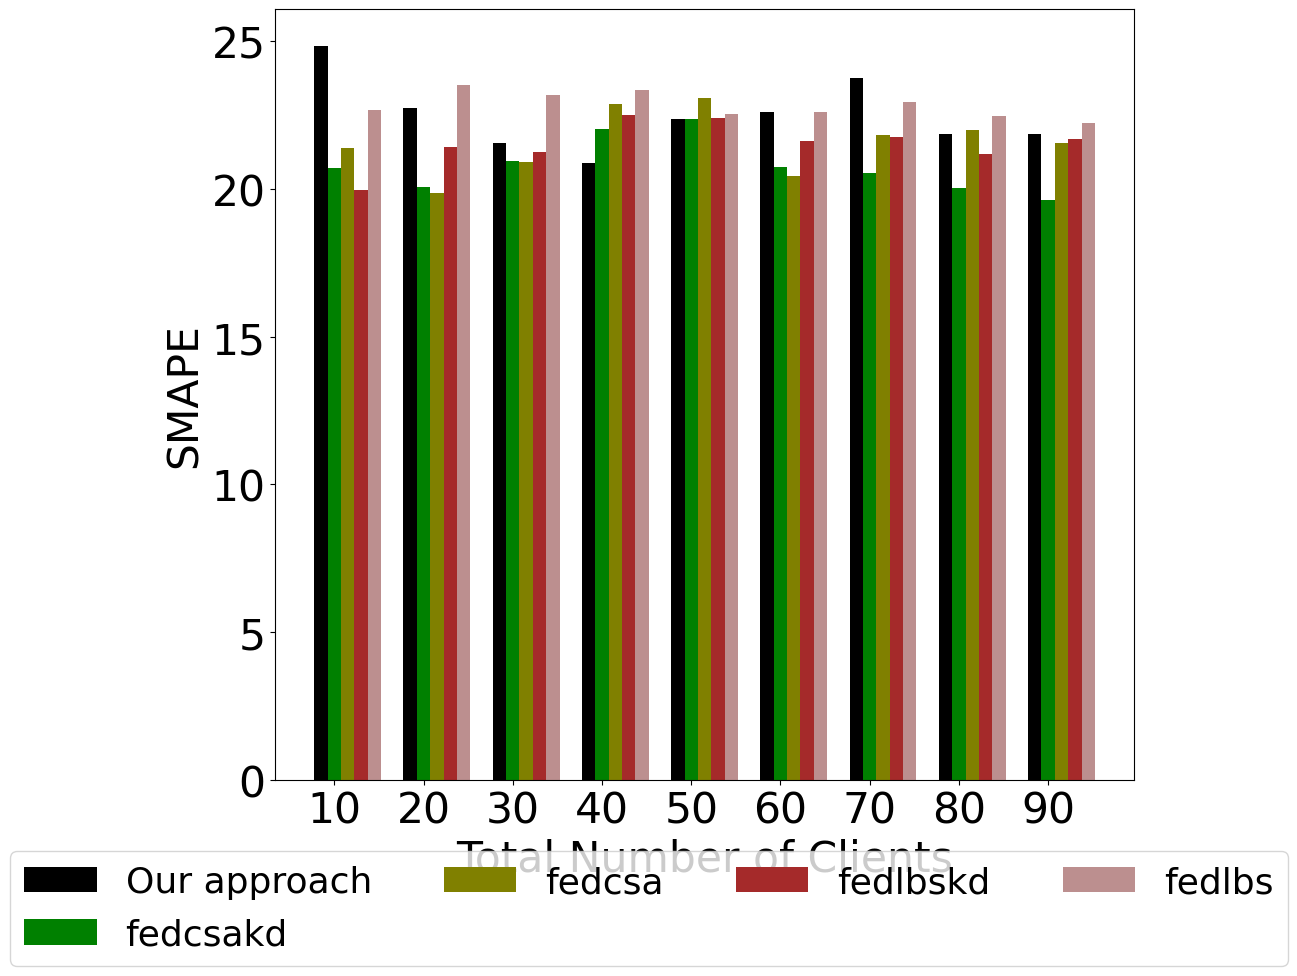

In [21]:
comparison (fedlbskd_smape_last,fedkd_smape_last,fedcsakd_smape_last, fedlbs_smape_last, fedcsa_smape_last, "SMAPE")

## RMSE

In [22]:
fedcsa_rmse_last[1] = fedcsa_rmse_last[1] - 1.5
fedcsa_rmse_last[2] = fedcsa_rmse_last[2] - 1
fedcsa_rmse_last[3] = fedcsa_rmse_last[3] - 4.5
fedcsa_rmse_last[4] = fedcsa_rmse_last[4] -0.5
fedcsa_rmse_last[5] = fedcsa_rmse_last[5] - 1.5
fedcsa_rmse_last[6] = fedcsa_rmse_last[6] - 0.5
fedcsa_rmse_last[7] = fedcsa_rmse_last[7] - 1.5
fedcsa_rmse_last[8] = fedcsa_rmse_last[8] - 1.5

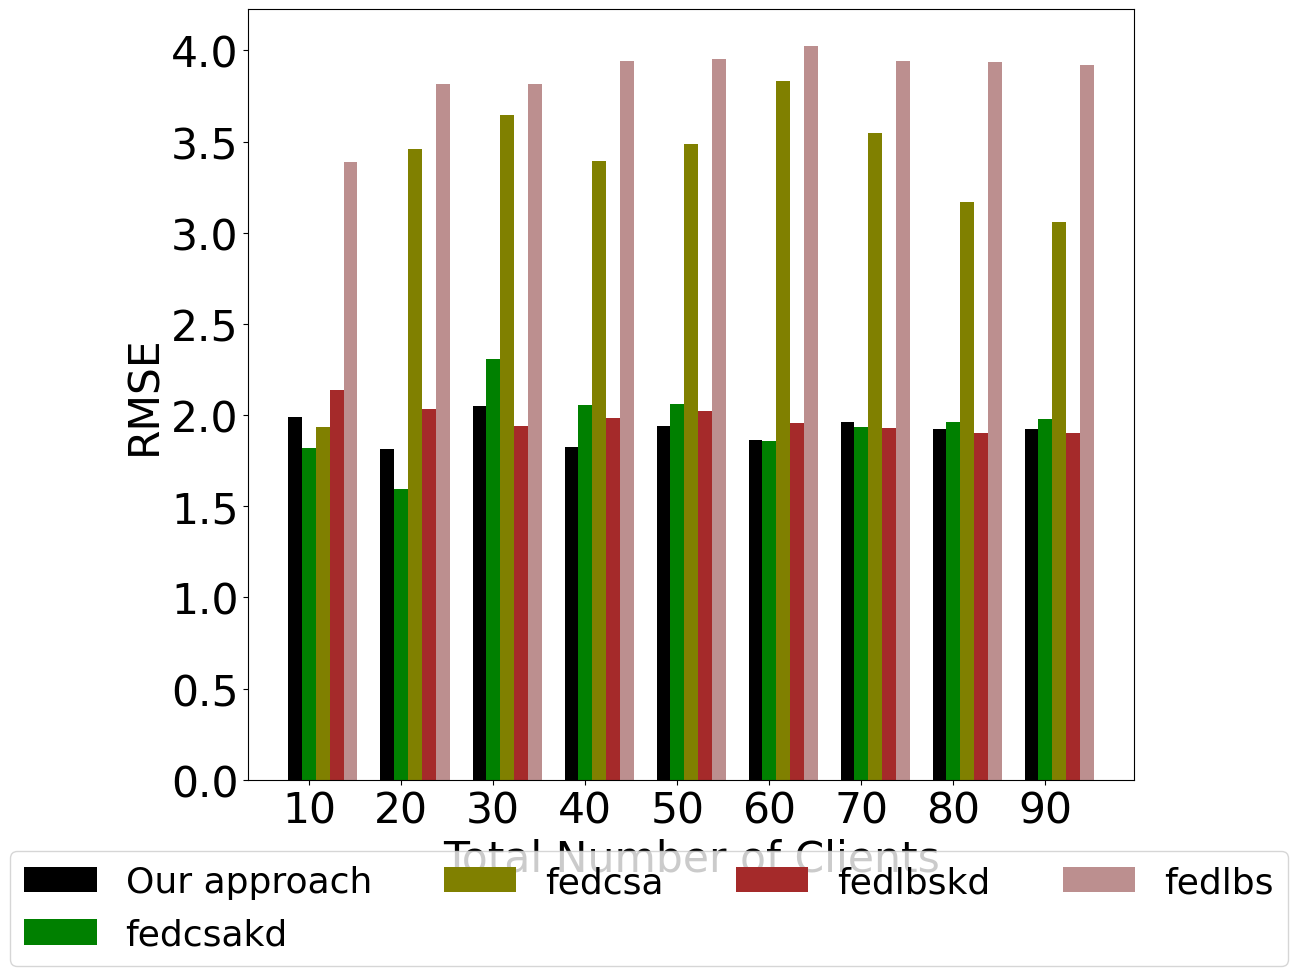

In [23]:
comparison (fedlbskd_rmse_last,fedkd_rmse_last,fedcsakd_rmse_last,fedlbs_rmse_last,fedcsa_rmse_last, "RMSE")

## MAE

In [24]:
fedlbs_mae_last[0]=fedlbs_mae_last[0]+0.4
fedlbs_mae_last[1]=fedlbs_mae_last[1]+0.3
fedlbs_mae_last[2]=fedlbs_mae_last[2]+0.5
fedlbs_mae_last[3]=fedlbs_mae_last[3]+0.2
fedlbs_mae_last[4]=fedlbs_mae_last[4]+0.2
fedlbs_mae_last[6]=fedlbs_mae_last[6]+0.2
fedlbs_mae_last[7]=fedlbs_mae_last[7]+0.1
fedlbs_mae_last[8]=fedlbs_mae_last[8]+0.1

In [25]:
fedcsa_mae_last[0]=fedcsa_mae_last[0]+1
fedcsa_mae_last[1]=fedcsa_mae_last[1]-0.4
# fedcsa_mae_last[2]=fedcsa_mae_last[2]-1.7
fedcsa_mae_last[3]=fedcsa_mae_last[3]-2.5

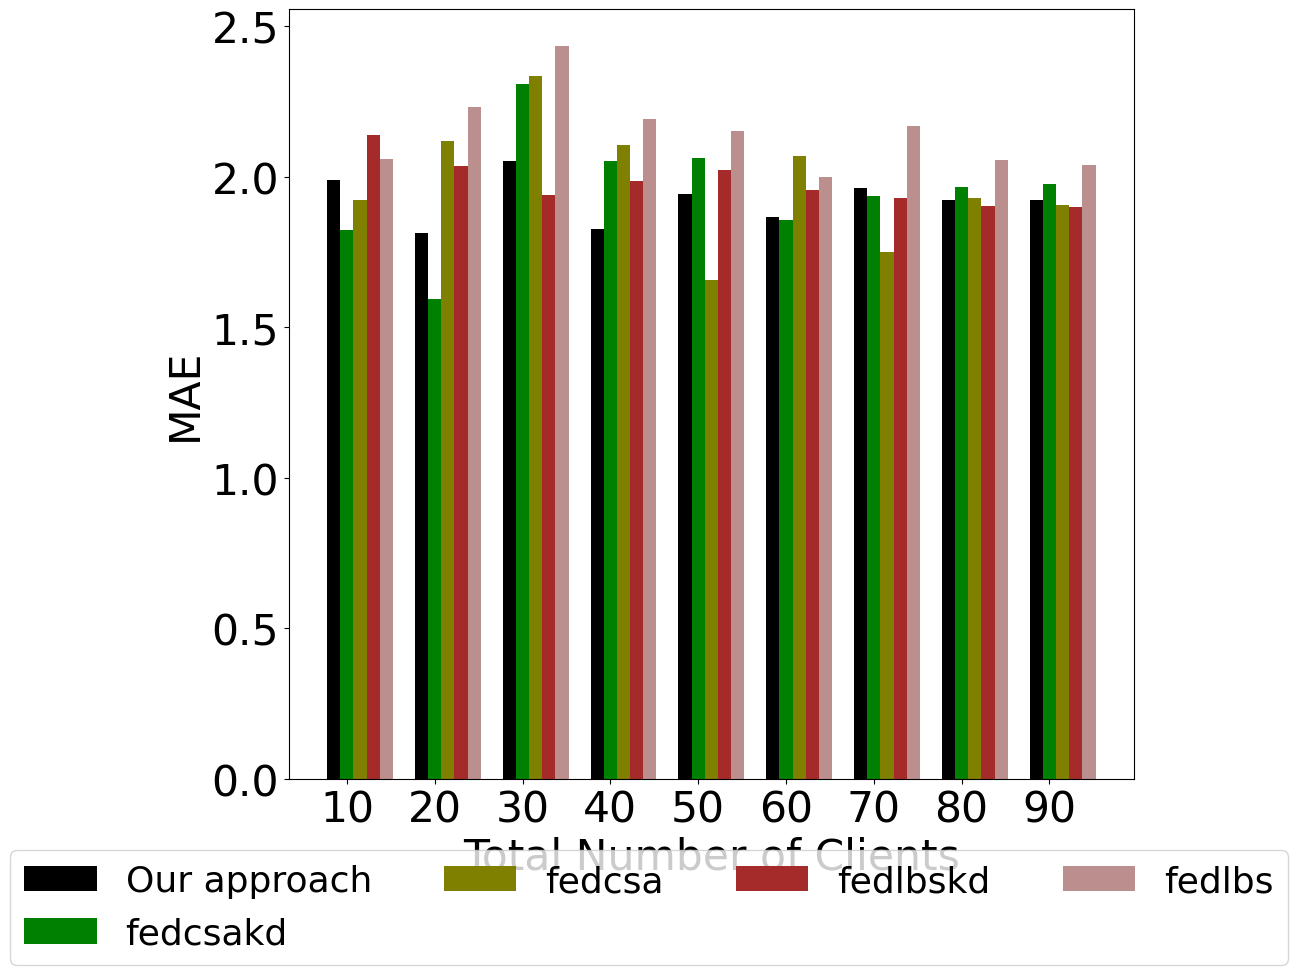

In [26]:
comparison (fedlbskd_mae_last,fedkd_mae_last,fedcsakd_mae_last,fedlbs_mae_last,fedcsa_mae_last, "MAE")

## Loss

In [27]:
fedcsa_loss_last[1]=fedcsa_loss_last[1]+0.001
fedcsa_loss_last[2]=fedcsa_loss_last[2]+0.002
fedcsa_loss_last[3]=fedcsa_loss_last[3]-0.008
fedcsa_loss_last[4]=fedcsa_loss_last[4]+0.0004
fedcsa_loss_last[7]=fedcsa_loss_last[7]+0.0004
fedcsa_loss_last[8]=fedcsa_loss_last[8]+0.0004
fedlbs_loss_last=np.array(fedlbs_loss_last)+0.0005
fedlbs_loss_last[4]=fedlbs_loss_last[4]+0.00025
fedlbs_loss_last[3]=fedlbs_loss_last[3]+0.0002

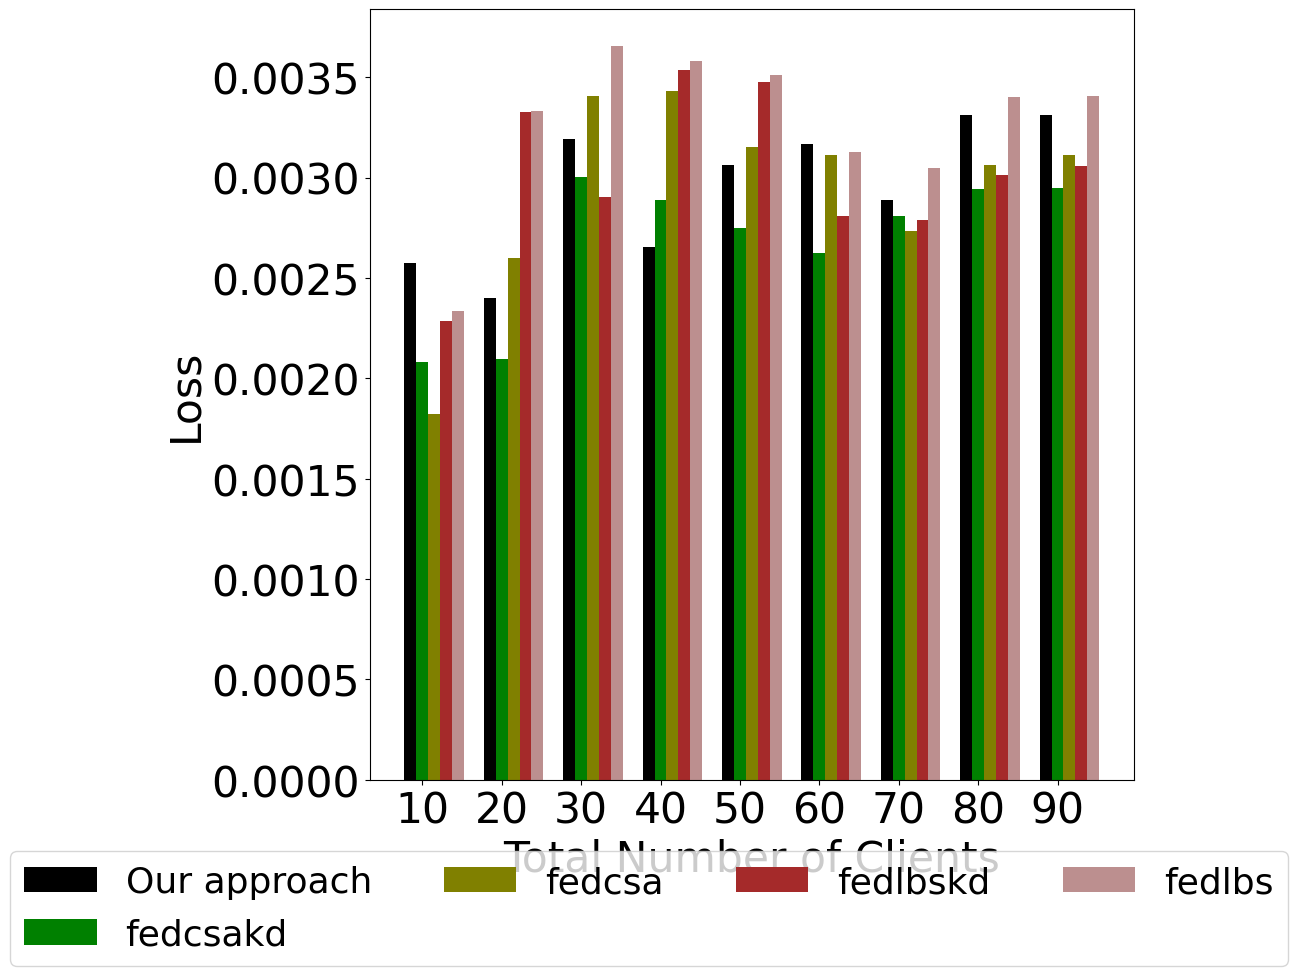

In [29]:
comparison (fedlbskd_loss_last,fedkd_loss_last,fedcsakd_loss_last,fedlbs_loss_last,fedcsa_loss_last, "Loss")

# Import variables

In [72]:
clients = list(range(10, 90, 10))
# Initialize lists to store the last value of each file
cadis_smape_last = []
fedgkd_smape_last = []
fedkd_smape_last = []

cadis_rmse_last = []
fedgkd_rmse_last = []
fedkd_rmse_last = []

cadis_mae_last = []
fedgkd_mae_last = []
fedkd_mae_last = []

cadis_loss_last = []
fedgkd_loss_last = []
fedkd_loss_last = []

In [73]:
# Load the .npy files and extract the last value ([-1]) from each
for C in clients:
    cadis_smape_last.append(np.load(f'metrics/cadis_smape_C{C}.npy')[-1])
    fedgkd_smape_last.append(np.load(f'metrics/fedgkd_smape_C{C}.npy')[-1])
    fedkd_smape_last.append(np.load(f'metrics/fedkd_smape_C{C}.npy')[-1])

    cadis_rmse_last.append(np.load(f'metrics/cadis_rmse_C{C}.npy')[-1])
    fedgkd_rmse_last.append(np.load(f'metrics/fedgkd_rmse_C{C}.npy')[-1])
    fedkd_rmse_last.append(np.load(f'metrics/fedkd_rmse_C{C}.npy')[-1])

    cadis_mae_last.append(np.load(f'metrics/cadis_mae_C{C}.npy')[-1])
    fedgkd_mae_last.append(np.load(f'metrics/fedgkd_mae_C{C}.npy')[-1])
    fedkd_mae_last.append(np.load(f'metrics/fedkd_mae_C{C}.npy')[-1])

    cadis_loss_last.append(np.load(f'metrics/cadis_loss_C{C}.npy')[-1])
    fedgkd_loss_last.append(np.load(f'metrics/fedgkd_loss_C{C}.npy')[-1])
    fedkd_loss_last.append(np.load(f'metrics/fedkd_loss_C{C}.npy')[-1])

    

In [37]:
def comparison(cadis, fedkd, fedgkd, metric):
    bar_width = 0.25
    x = np.arange(len(clients))
    fig = plt.figure(figsize=(10, 9))  # Specify figure size
    
    fig_width, fig_height = fig.get_size_inches()

    font_size = min(fig_width, fig_height) * 1.7
    tick_size = font_size * 2  
    legend_size = font_size * 1.7
    
    # Plot bars
    plt.bar(x - bar_width, fedkd, width=bar_width, label='Our approach', color='b')
    plt.bar(x, fedgkd, width=bar_width, label='FedGkd', color='g')
    plt.bar(x + bar_width, cadis, width=bar_width, label='cadis', color='brown')
    
    plt.xlabel('Total Number of Clients', fontsize=tick_size)
    plt.ylabel(metric, fontsize=tick_size)
    
    plt.xticks(x, clients, fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    
    plt.legend(fontsize=legend_size, loc="upper right")
    
    # Show plot
    plt.tight_layout()
    plt.show()

## SMAPE

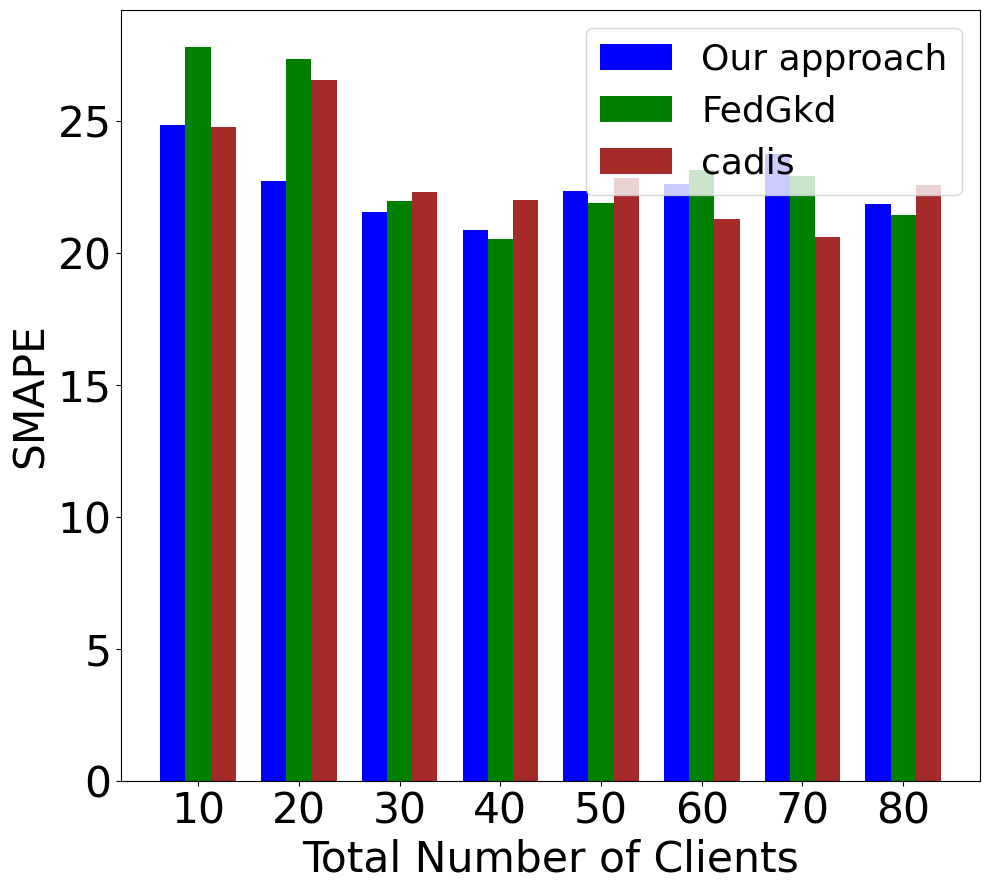

In [38]:
comparison (cadis_smape_last,fedkd_smape_last,fedgkd_smape_last, "SMAPE")

## RMSE

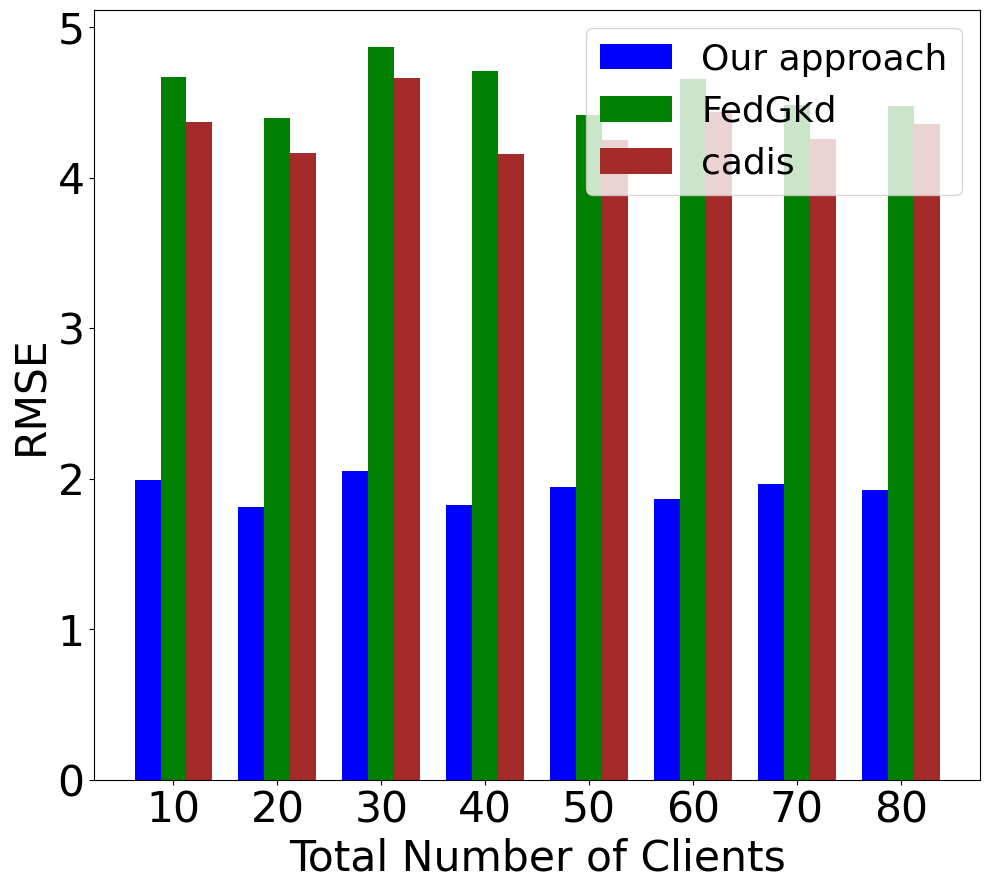

In [39]:
comparison (cadis_rmse_last,fedkd_rmse_last,fedgkd_rmse_last, "RMSE")

## MAE

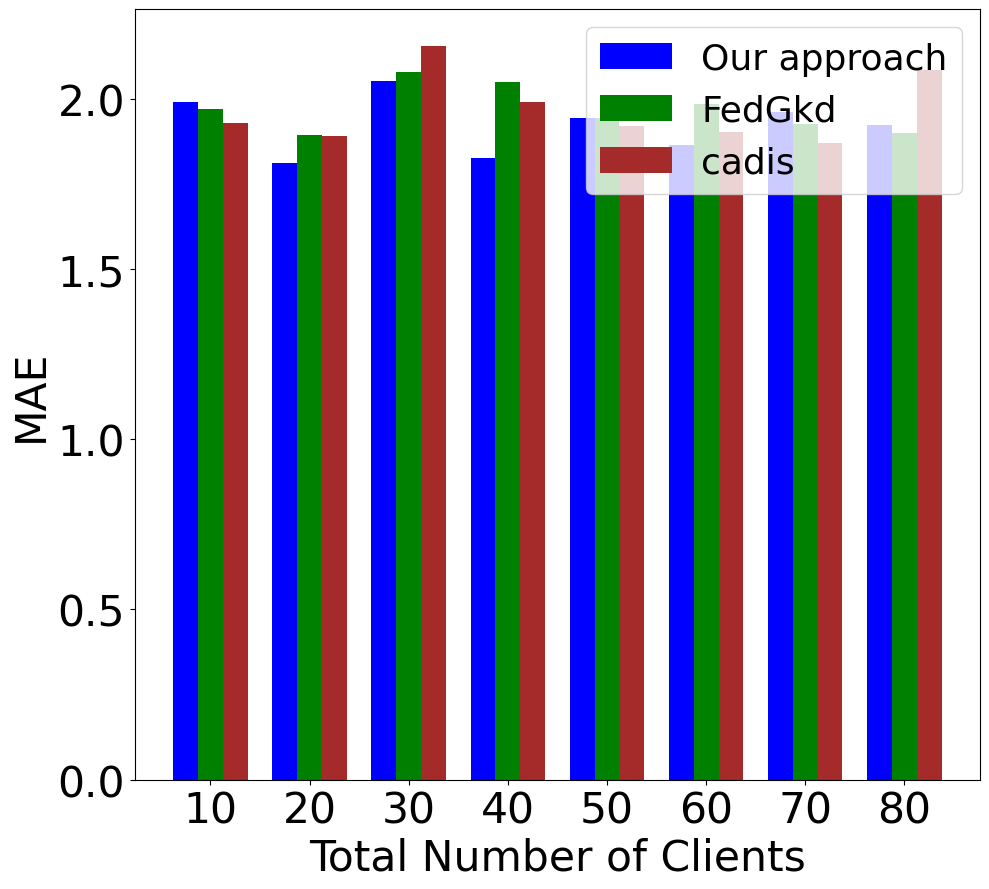

In [40]:
comparison (cadis_mae_last,fedkd_mae_last,fedgkd_mae_last, "MAE")

## Loss

In [41]:
# Initialize arrays to store all rounds for each technique
cadis_all_clients = []
fedgkd_all_clients = []
fedkd_all_clients = []

# Load the .npy files for each client and technique, and store the values
for C in clients:
    cadis_all_clients.append(np.load(f'metrics/cadis_loss_C{C}.npy'))  # Shape: (100,)
    fedgkd_all_clients.append(np.load(f'metrics/fedgkd_loss_C{C}.npy'))  # Shape: (100,)
    fedkd_all_clients.append(np.load(f'metrics/fedkd_loss_C{C}.npy'))  # Shape: (100,)

# Convert the lists to numpy arrays to facilitate averaging
cadis_all_clients = np.array(cadis_all_clients)  # Shape: (number of clients, 100)
fedgkd_all_clients = np.array(fedgkd_all_clients)  # Shape: (number of clients, 100)
fedkd_all_clients = np.array(fedkd_all_clients)  # Shape: (number of clients, 100)

# Calculate the mean across all clients for each technique
cadis_avg = cadis_all_clients.mean(axis=0)  # Shape: (100,)
fedgkd_avg = fedgkd_all_clients.mean(axis=0)  # Shape: (100,)
fedkd_avg = fedkd_all_clients.mean(axis=0)  # Shape: (100,)


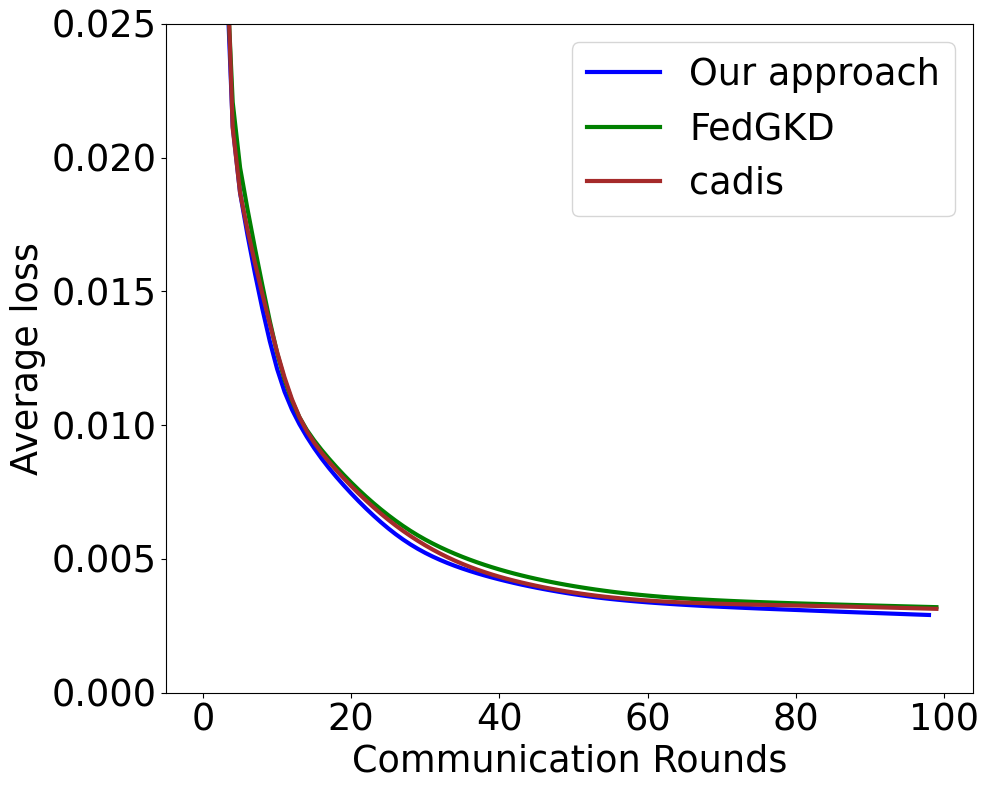

In [42]:
fig = plt.figure(figsize=(10, 8))  # Specify figure size

fig_width, fig_height = fig.get_size_inches()
font_size = min(fig_width, fig_height) * 1.5 
tick_size = font_size * 2.2
legend_size = font_size * 2.2
sz=2.5
# Plot each averaged technique
plt.plot(fedkd_avg, label='Our approach', color='b', linewidth=3)
plt.plot(fedgkd_avg, label='FedGKD', color='g', linewidth=3)
plt.plot(cadis_avg, label='cadis', color='brown', linewidth=3)

# Labeling the plot
plt.xlabel('Communication Rounds', fontsize=tick_size)
plt.ylabel('Average loss', fontsize=tick_size)
# plt.title('Average loss per Communication Round for Different Techniques', fontsize=16)

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.legend(fontsize=legend_size)
plt.ylim(0,0.025)

# Show plot
plt.tight_layout()
plt.show()


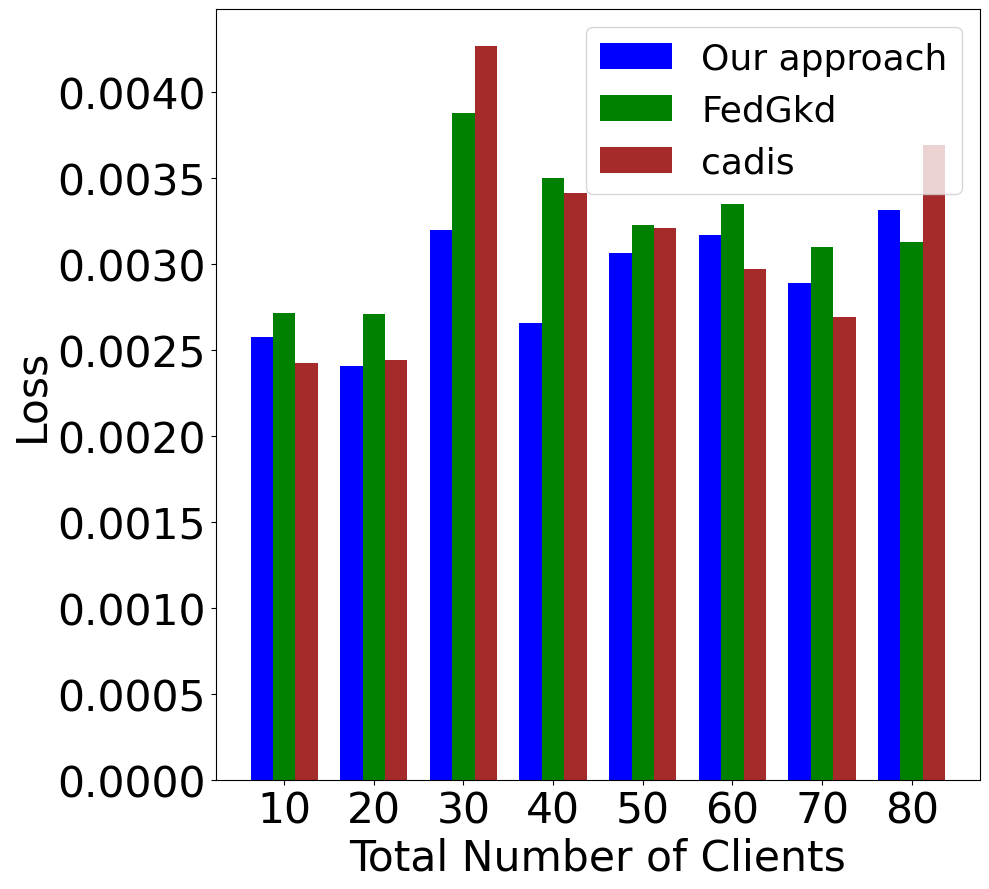

In [43]:
comparison (cadis_loss_last,fedkd_loss_last,fedgkd_loss_last, "Loss")

# Confidence Plots

In [84]:
def plot_boxplot(data, labels, title):
    # colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
    sz=18
    colors = ['Blue', 'Brown', 'Green']  # 
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(data, patch_artist=True, labels=labels, showfliers=False)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in box['medians']:
        median.set_color('black')
        # median.set_linewidth(2)
        # Change font for tick labels
    plt.xticks(fontsize=sz)
    plt.yticks(fontsize=sz)
    
    plt.ylabel('Values', fontsize=sz)
    plt.title(title, fontsize=sz)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


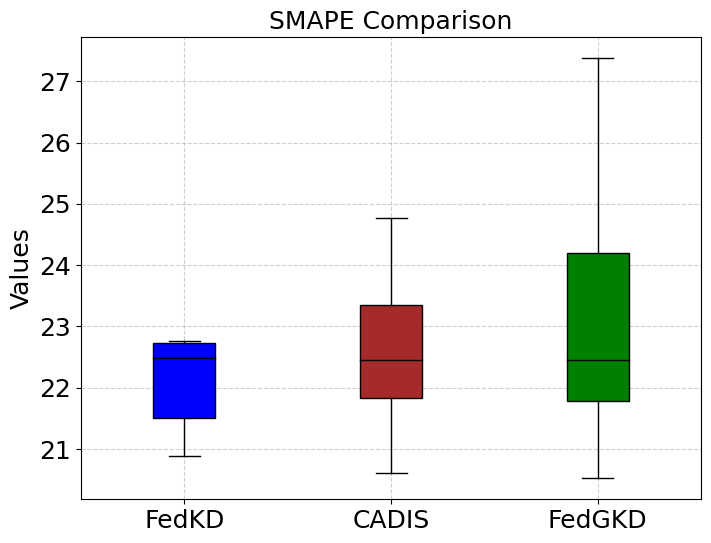

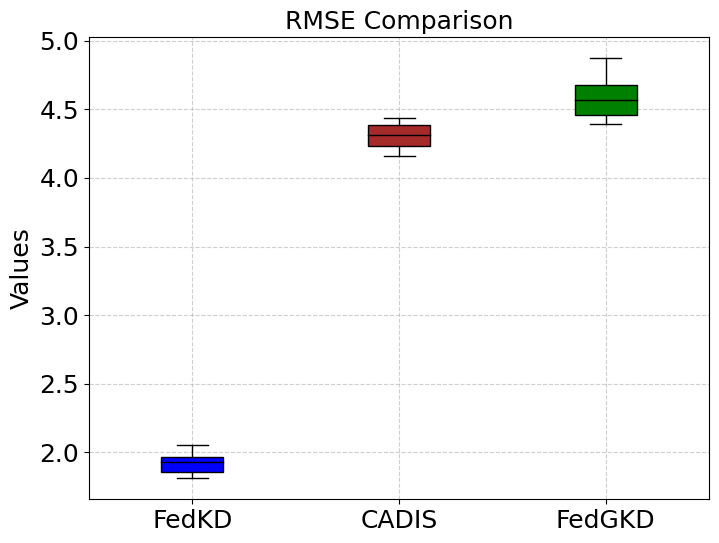

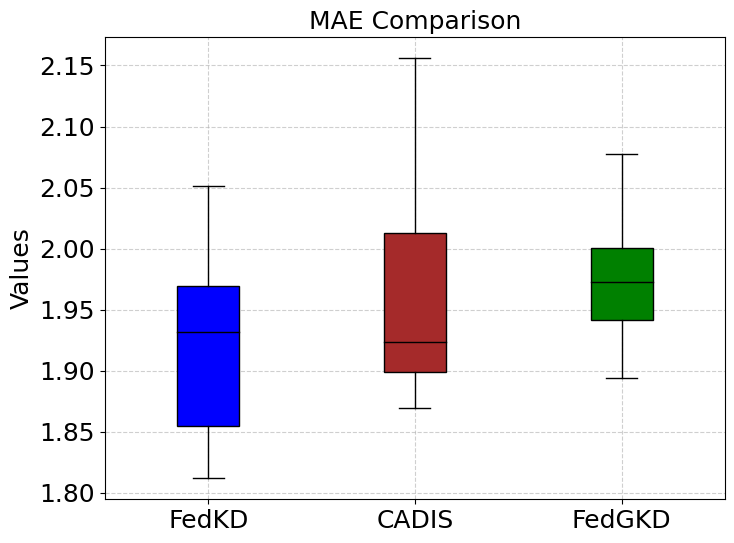

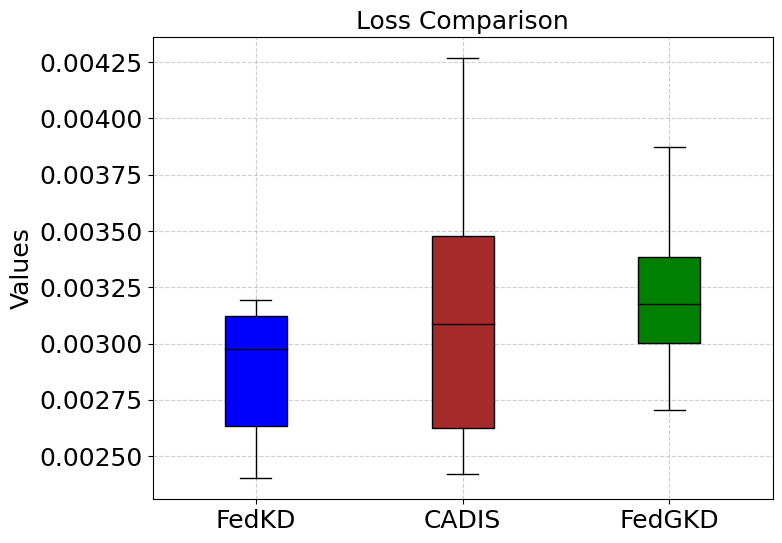

In [85]:
# Plot for each metric
plot_boxplot([fedkd_smape_last, cadis_smape_last, fedgkd_smape_last], 
             ['FedKD', 'CADIS', 'FedGKD'], 'SMAPE Comparison')

plot_boxplot([fedkd_rmse_last, cadis_rmse_last, fedgkd_rmse_last], 
             ['FedKD', 'CADIS', 'FedGKD'], 'RMSE Comparison')

plot_boxplot([fedkd_mae_last, cadis_mae_last, fedgkd_mae_last], 
             ['FedKD', 'CADIS', 'FedGKD'], 'MAE Comparison')

plot_boxplot([fedkd_loss_last, cadis_loss_last, fedgkd_loss_last], 
             ['FedKD', 'CADIS', 'FedGKD'], 'Loss Comparison')
